In [1]:
"""
This script creates the figure of the components of the 
daily mass balance of the glacier-wide.
"""

import xarray as xr
import pandas as pd
import numpy as np
import datetime
from dateutil import tz
import netCDF4
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from my_fun.hour_to_day_sum import hour_to_day_sum
from my_fun.create_date import create_date


In [2]:
filename_nc  = '../../data/output/Peru_out_1_20160901-20170831.nc'
dir_output   = 'out'

name_fig     = 'MB_com_day'

ds = xr.open_dataset(filename_nc)

time_nc = ds['time'].values
mask_nc = ds['MASK'].values
lat_nc  = ds['lat'].values        
lon_nc  = ds['lon'].values
dem_nc   = ds['HGT'].values
lat_n = len(lat_nc)
lon_n = len(lon_nc)
     


In [3]:
var_t = create_date(time_nc)
days_num = int(len(time_nc)/24)

var1a    = ds['SNOWFALL'].values
var1_d   = hour_to_day_sum(days_num,var1a)
time_d,x,y = var1_d.shape
for t in range((time_d)):
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var1_d[t,i,j] = var1_d[t,i,j]
                else:
                    var1_d[t,i,j] = np.nan
var1 = np.zeros((time_d))
for t in range(time_d):
    var1[t] = np.nanmean(var1_d[t,:,:])

var1a    = ds['REFREEZE'].values
var1_d   = hour_to_day_sum(days_num,var1a)
time_d,x,y = var1_d.shape
for t in range((time_d)):
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var1_d[t,i,j] = var1_d[t,i,j]
                else:
                    var1_d[t,i,j] = np.nan

var2 = np.zeros((time_d))
for t in range(time_d):
    var2[t] = np.nanmean(var1_d[t,:,:])
    
var1a    = ds['surfM'].values
var1_d   = hour_to_day_sum(days_num,var1a)
time_d,x,y = var1_d.shape
for t in range((time_d)):
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var1_d[t,i,j] = var1_d[t,i,j]
                else:
                    var1_d[t,i,j] = np.nan

var3 = np.zeros((time_d))
for t in range(time_d):
    var3[t] = np.nanmean(var1_d[t,:,:])


var1a    = ds['subM'].values
var1_d   = hour_to_day_sum(days_num,var1a)
time_d,x,y = var1_d.shape
for t in range((time_d)):
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var1_d[t,i,j] = var1_d[t,i,j]
                else:
                    var1_d[t,i,j] = np.nan

var4 = np.zeros((time_d))
for t in range(time_d):
    var4[t] = np.nanmean(var1_d[t,:,:])

var1a    = ds['SUBLIMATION'].values
var1_d   = hour_to_day_sum(days_num,var1a)
time_d,x,y = var1_d.shape
for t in range((time_d)):
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var1_d[t,i,j] = var1_d[t,i,j]
                else:
                    var1_d[t,i,j] = np.nan

var5 = np.zeros((time_d))
for t in range(time_d):
    var5[t] = np.nanmean(var1_d[t,:,:])

var1a    = ds['DEPOSITION'].values
var1_d   = hour_to_day_sum(days_num,var1a)
time_d,x,y = var1_d.shape
for t in range((time_d)):
    for i in range(lat_n):
        for j in range(lon_n):
                if mask_nc[i,j] == 1:
                    var1_d[t,i,j] = var1_d[t,i,j]
                else:
                    var1_d[t,i,j] = np.nan

var6 = np.zeros((time_d))
for t in range(time_d):
    var6[t] = np.nanmean(var1_d)



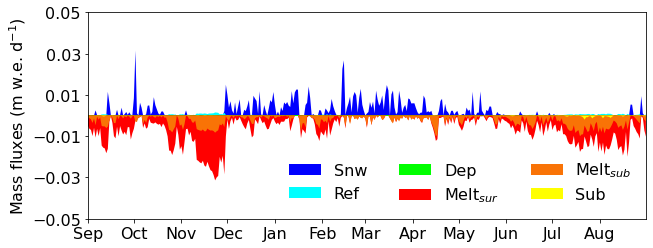

In [5]:
fig, ax = plt.subplots(figsize=(10,3.8))
ax.fill_between(var_t, var1,facecolor=([0,0,1]),label='Snw')
ax.fill_between(var_t, var4,facecolor=([0,1,1]),label='Ref')
ax.fill_between(var_t, var6,facecolor=([0,1,0]),label='Dep')
ax.fill_between(var_t, -var3,facecolor=([1,0,0]),label='Melt$_{sur}$')
ax.fill_between(var_t, -var2,facecolor=('#f97306'),label='Melt$_{sub}$')
ax.fill_between(var_t, var5,facecolor=([1,1,0]),label='Sub')
ax.set_yticks(np.arange(-0.070, 0.080, 0.02))
date_form = mdates.DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.set_ylabel('Mass fluxes (m w.e. d$^{-1}$)')
ax.set_xlim(pd.Timestamp('2016-09-01'), pd.Timestamp('2017-08-31'))
ax.set_ylim(-0.050,0.050)
ax.legend(loc='lower right',ncol=3, frameon=False)
font_f = 16
plt.rc('font', size=font_f)          # controls default text sizes
plt.rc('axes', titlesize=font_f)     # fontsize of the axes title
plt.rc('axes', labelsize=font_f)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_f)    # legend fontsize

fig.savefig(dir_output+'/'+name_fig+'.pdf',dpi = 300, bbox_inches = 'tight', 
             pad_inches = 0.1, format='pdf')
